In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset = 'squirrel'

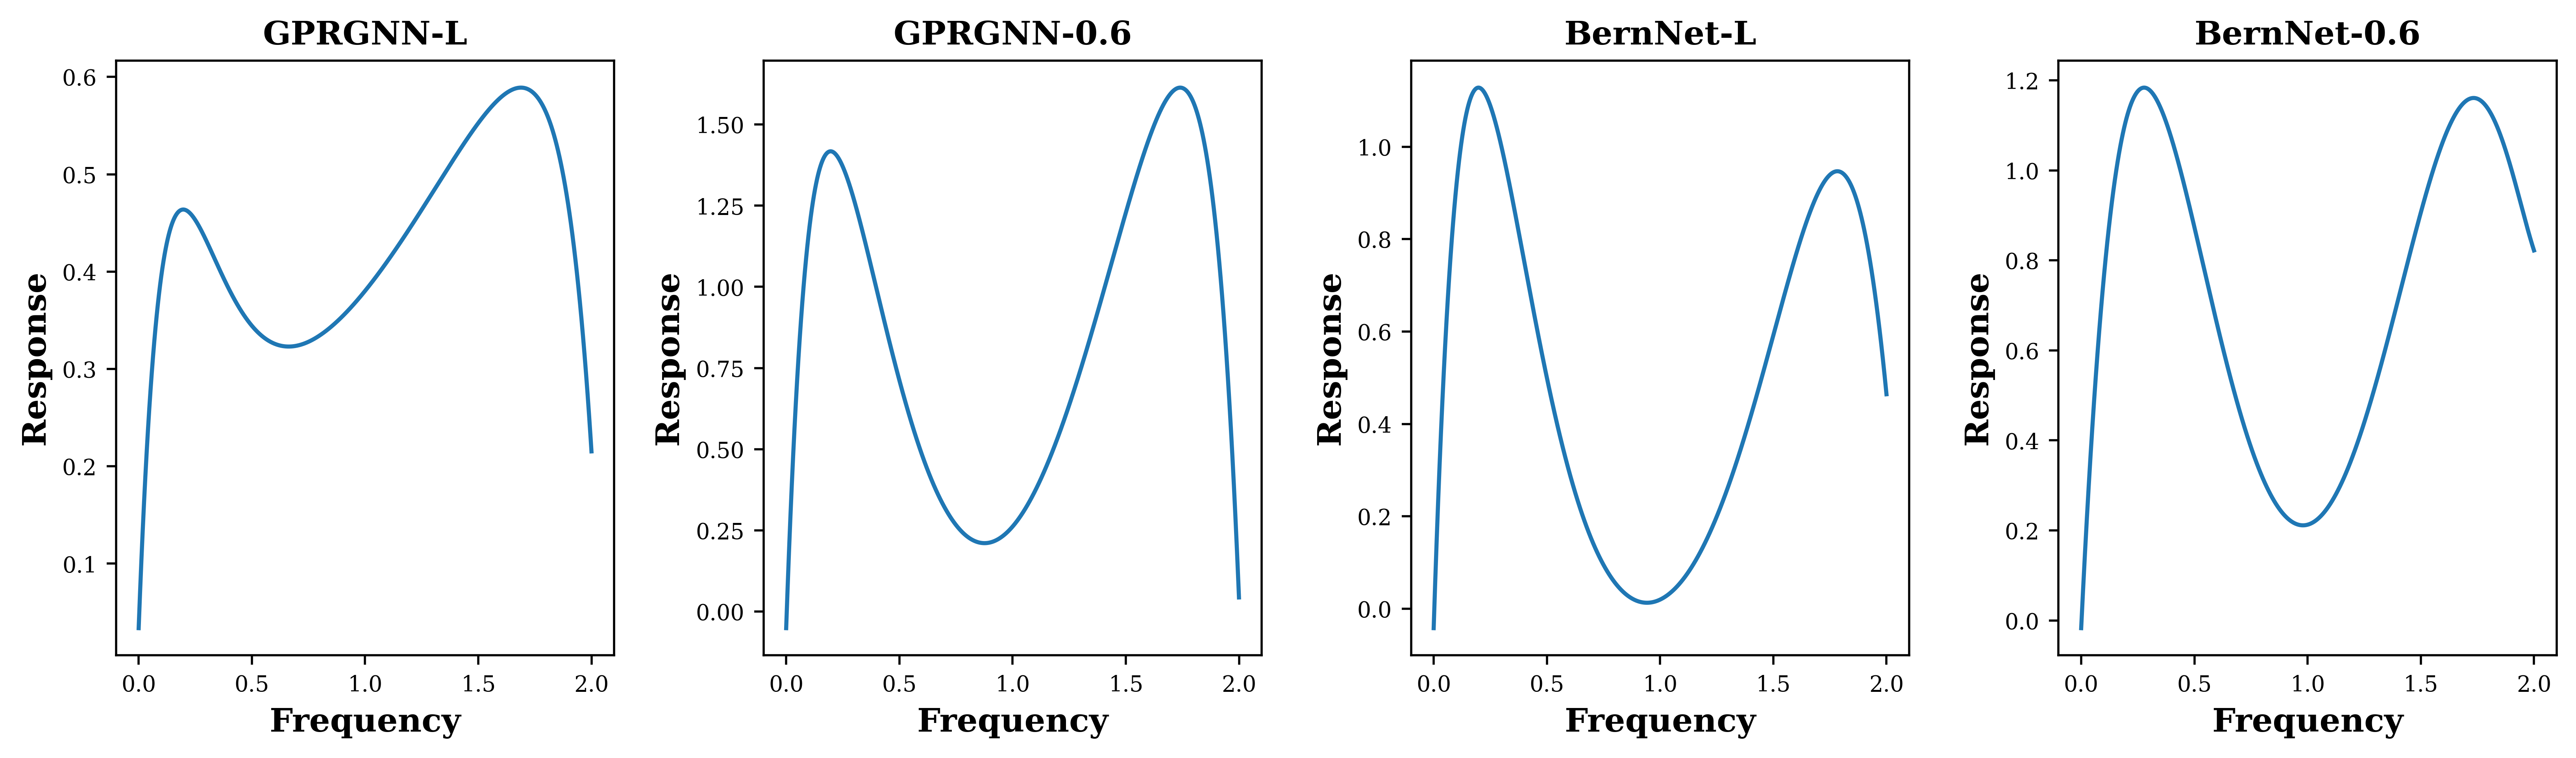

In [4]:
plt.rcParams['font.family'] = 'serif'
fig, ax = plt.subplots(1,4, figsize=(16, 4), dpi=500)
ax = ax.ravel()


m = 0
coef = np.load(f'./results/gamma_10_Random_{dataset}_gprgnn_unsupervised.npy')
lambs = np.arange(0,2,2/10000)
base0 = np.ones_like(lambs)
for i in np.arange(1, coef.shape[0], 1):
    base0 = np.column_stack((base0, (1-lambs) ** i))
y = (coef * base0).sum(axis=1)
p = sns.lineplot(x=lambs,y=y, ax=ax[m])
ax[m].set_xlabel('Frequency', fontsize=12, fontweight='bold')
ax[m].set_ylabel('Response', fontsize=12, fontweight='bold')
ax[m].set_title(f'GPRGNN-L', fontsize=12, fontweight='bold')
# Adjust tick label font size
ax[m].tick_params(axis='both', which='major', labelsize=8)

m = 1
coef = np.load(f'./results/gamma_10_Random_{dataset}_0.6_gprgnn.npy')[1]
lambs = np.arange(0,2,2/10000)
base0 = np.ones_like(lambs)
for i in np.arange(1, coef.shape[0], 1):
    base0 = np.column_stack((base0, (1-lambs) ** i))
y = (coef * base0).sum(axis=1)
p = sns.lineplot(x=lambs,y=y, ax=ax[m])
ax[m].set_xlabel('Frequency', fontsize=12, fontweight='bold')
ax[m].set_ylabel('Response', fontsize=12, fontweight='bold')
ax[m].set_title(f'GPRGNN-0.6', fontsize=12, fontweight='bold')
# Adjust tick label font size
ax[m].tick_params(axis='both', which='major', labelsize=8)

m = 2
from scipy.special import comb
coef_bern = np.load(f'./results/gamma_10_Random_{dataset}_bernnet_unsupervised.npy')
K = coef_bern.shape[0] - 1
lambs = np.arange(0,2,2/10000)
base0 = (comb(K, 0)/(2**K)) * (2-lambs) ** K
for i in np.arange(1, K+1, 1):
    base0 = np.column_stack((base0, comb(K, i) / (2**K) * ((2-lambs) ** (K-i)) * (lambs ** i)))
y = (coef_bern * base0).sum(axis=1)
p = sns.lineplot(x=lambs,y=y, ax=ax[m])
ax[m].set_xlabel('Frequency', fontsize=12, fontweight='bold')
ax[m].set_ylabel('Response', fontsize=12, fontweight='bold')
ax[m].set_title(f'BernNet-L', fontsize=12, fontweight='bold')
# Adjust tick label font size
ax[m].tick_params(axis='both', which='major', labelsize=8)


m = 3
from scipy.special import comb
coef_bern = np.load(f'./results/gamma_10_Random_{dataset}_0.6_bernnet.npy')[0]
K = coef_bern.shape[0] - 1
lambs = np.arange(0,2,2/10000)
base0 = (comb(K, 0)/(2**K)) * (2-lambs) ** K
for i in np.arange(1, K+1, 1):
    base0 = np.column_stack((base0, comb(K, i) / (2**K) * ((2-lambs) ** (K-i)) * (lambs ** i)))
y = (coef_bern * base0).sum(axis=1)
p = sns.lineplot(x=lambs,y=y, ax=ax[m])
ax[m].set_xlabel('Frequency', fontsize=12, fontweight='bold')
ax[m].set_ylabel('Response', fontsize=12, fontweight='bold')
ax[m].set_title(f'BernNet-0.6', fontsize=12, fontweight='bold')
# Adjust tick label font size
ax[m].tick_params(axis='both', which='major', labelsize=8)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()
fig.tight_layout()
fig.savefig('Response.pdf', dpi=500)
